**Exploratory Data Analysis:**

This file is composed of components of the EDA process for preliminary exploration of your data. This code is not a complete EDA, but rather a preliminary examination of data. Please see the Table of Contents to explore different areas of EDA.

DataSet link: https://drive.google.com/file/d/1mV_ifvzzrlPWgdSzrwW5ZK-aF3S9tydZ/view


The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  

In [162]:
#importing requirements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy import stats
filterwarnings("ignore")
%matplotlib inline     
sns.set(color_codes=True)

**Step - 1 - Introduction -&gt; Give a detailed data description and objective**

Explanation: https://docs.google.com/document/d/14d4n90nryAUgA-IdNSXJAFzmynn6WTT4XfS7N4tum7s/edit

**Step - 2 - Import the data and display the head, shape and description of the data.**

In [163]:
# read an excel file and convert into a dataframe object
df = pd.DataFrame(pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx"))
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [165]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

**Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..**

1. Understand the probability and frequency distribution of each numerical column

2. Understand the frequency distribution of each categorical Variable/Column

3. Mention observations after each plot 


In [166]:
df.isnull().sum()   # Used to count the null values in rows

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

It shows absence of null value and all the columns are filled

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e9e368610>,
      dtype=object)

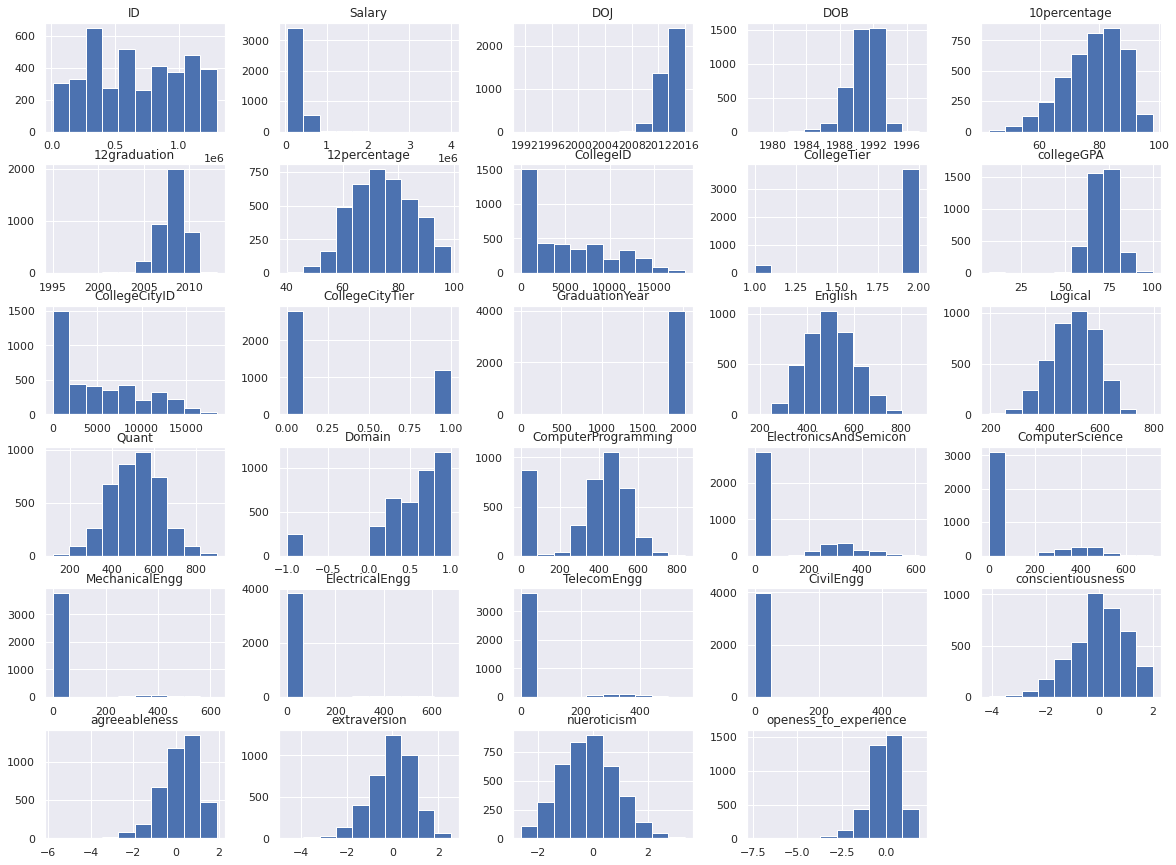

In [167]:
df.hist(figsize = (20, 15))

As a part of this case study, we will focus on Jobcity, Domian, ComputerProgramming, ElectronicAndSemicon, ComputerScience, MechanicalEngg, TelecomEngg and CivilEngg.
From the above graph it is clear that listed columns have outliers.

In [168]:
#finding number of columns has -1 as outliers
col=df.columns
output=[len(df[df[x]==-1])for x in col]
print(output)

[0, 0, 0, 0, 0, 0, 461, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 868, 2854, 3096, 3763, 3837, 3624, 3956, 0, 0, 0, 0, 0]


**From the above result, the occurance of -1 in each columns is obeserved.**

Jobcity: 461

Domian: 246

ComputerProgramming: 868

ElectronicAndSemicon: 2854

ComputerScience: 3096

MechanicalEngg: 3763

ElectricalEngg: 3837

TelecomEngg: 3624

CivilEngg: 3956

In [169]:
df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [170]:
df.Domain.value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

In [171]:
df.ComputerProgramming.value_counts()

-1      868
 445    151
 435    144
 475    139
 465    134
       ... 
 214      1
 494      1
 840      1
 394      1
 554      1
Name: ComputerProgramming, Length: 79, dtype: int64

In [172]:
df.ElectronicsAndSemicon.value_counts()

-1      2854
 333     124
 300     114
 366     103
 266      88
 400      84
 292      74
 324      66
 356      66
 233      53
 388      47
 433      46
 200      43
 260      36
 466      31
 452      29
 228      24
 500      23
 420      22
 196      16
 166      12
 484      10
 516       9
 533       6
 548       5
 566       4
 133       4
 164       3
 612       2
Name: ElectronicsAndSemicon, dtype: int64

In [173]:
df.ComputerScience.value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 223      14
 592      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

In [174]:
df.MechanicalEngg.value_counts()

-1      3763
 366      20
 446      16
 438      15
 420      14
 376      13
 313      13
 393      13
 407      12
 346      11
 469      10
 473      10
 553       8
 435       7
 383       6
 340       6
 526       5
 409       5
 286       5
 500       4
 253       4
 284       3
 332       3
 538       3
 254       3
 580       3
 616       2
 564       2
 606       2
 223       2
 512       2
 561       2
 260       2
 358       1
 280       1
 315       1
 233       1
 306       1
 461       1
 180       1
 206       1
 623       1
Name: MechanicalEngg, dtype: int64

In [175]:
df.ElectricalEngg.value_counts()

-1      3837
 420      16
 446      14
 388      10
 473      10
 452      10
 356       9
 500       8
 580       8
 366       7
 324       7
 393       7
 553       6
 313       6
 516       5
 260       4
 292       4
 340       3
 228       3
 526       3
 484       3
 633       3
 548       2
 433       2
 606       2
 612       2
 660       2
 286       2
 676       1
 411       1
 206       1
Name: ElectricalEngg, dtype: int64

In [176]:
df.TelecomEngg.value_counts()

-1      3624
 393      45
 366      43
 260      35
 313      34
 340      32
 286      31
 420      26
 446      16
 388      14
 233      14
 473      13
 292      13
 356      12
 324      11
 206       8
 500       5
 526       5
 516       4
 484       4
 228       3
 548       2
 153       1
 196       1
 164       1
 452       1
Name: TelecomEngg, dtype: int64

In [177]:
df.CivilEngg.value_counts()

-1      3956
 356       6
 292       6
 388       4
 260       3
 320       3
 500       2
 300       2
 340       2
 516       1
 460       1
 420       1
 280       1
 433       1
 380       1
 452       1
 277       1
 166       1
 322       1
 200       1
 440       1
 400       1
 480       1
Name: CivilEngg, dtype: int64

**We will drop columns which have lot of outliers and unique ID's of users**

In [178]:
df=df.drop(['ID','CollegeID','CollegeCityID','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'],axis=1)
#dF['JobCity']=DF['JobCity'].replace(-1, 'Bangalore')
#dF['Domain']=DF['Domain'].replace(-1.000000, DF['Domain'].mean())
#dF['ComputerProgramming']=DF['ComputerProgramming'].replace(-1, DF['ComputerProgramming'].mean())

**Segregating numerical and categorical columns**

In [179]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data

Unnamed: 0        DOJ                  DOL                  Designation  \
0         train 2012-06-01              present      senior quality engineer   
1         train 2013-09-01              present            assistant manager   
2         train 2014-06-01              present             systems engineer   
3         train 2011-07-01              present     senior software engineer   
4         train 2014-03-01  2015-03-01 00:00:00                          get   
...         ...        ...                  ...                          ...   
3993      train 2011-10-01  2012-10-01 00:00:00            software engineer   
3994      train 2013-07-01  2013-07-01 00:00:00             technical writer   
3995      train 2013-07-01              present  associate software engineer   
3996      train 2014-07-01  2015-01-01 00:00:00           software developer   
3997      train 2013-02-01              present      senior systems engineer   

               JobCity Gender        DOB                         10board  \
0            Bangalore      f 1990-02-19  board ofsecondary education,ap   
1               Indore      m 1989-10-04                            cbse   
2              Chennai      f 1992-08-03                            cbse   
3              Gurgaon      m 1989-12-05                            cbse   
4              Manesar      m 1991-02-27                            cbse   
...                ...    ...        ...                             ...   
3993        New Delhi       m 1987-04-15                            cbse   
3994         Hyderabad      f 1992-08-27                     state board   
3995         Bangalore      m 1991-07-03                      bse,odisha   
3996  Asifabadbanglore      f 1992-03-20                     state board   
3997           Chennai      f 1991-02-26                            cbse   

                                 12board       Degree  \
0     board of intermediate education,ap  B.Tech/B.E.   
1                                   cbse  B.Tech/B.E.   
2                                   cbse  B.Tech/B.E.   
3                                   cbse  B.Tech/B.E.   
4                                   cbse  B.Tech/B.E.   
...                                  ...          ...   
3993                                cbse  B.Tech/B.E.   
3994                         state board  B.Tech/B.E.   
3995                         chse,odisha  B.Tech/B.E.   
3996                         state board  B.Tech/B.E.   
3997                                cbse  B.Tech/B.E.   

                                 Specialization    CollegeState  
0                          computer engineering  Andhra Pradesh  
1     electronics and communication engineering  Madhya Pradesh  
2                        information technology   Uttar Pradesh  
3                          computer engineering           Delhi  
4     electronics and communication engineering   Uttar Pradesh  
...                                         ...             ...  
3993                     information technology         Haryana  
3994  electronics and communication engineering       Telangana  
3995                       computer engineering          Orissa  
3996             computer science & engineering       Karnataka  
3997                     information technology      Tamil Nadu  

[3998 rows x 12 columns]

In [180]:
numeric_data

Salary  10percentage  12graduation  12percentage  CollegeTier  \
0      420000         84.30          2007         95.80            2   
1      500000         85.40          2007         85.00            2   
2      325000         85.00          2010         68.20            2   
3     1100000         85.60          2007         83.60            1   
4      200000         78.00          2008         76.80            2   
...       ...           ...           ...           ...          ...   
3993   280000         52.09          2006         55.50            2   
3994   100000         90.00          2009         93.00            2   
3995   320000         81.86          2008         65.50            2   
3996   200000         78.72          2010         69.88            2   
3997   400000         70.60          2008         68.00            2   

      collegeGPA  CollegeCityTier  GraduationYear  English  Logical  Quant  \
0          78.00                0            2011      515      585    525   
1          70.06                0            2012      695      610    780   
2          70.00                0            2014      615      545    370   
3          74.64                1            2011      635      585    625   
4          73.90                0            2012      545      625    465   
...          ...              ...             ...      ...      ...    ...   
3993       61.50                0            2010      365      334    475   
3994       77.30                1            2013      415      410    535   
3995       70.00                0            2012      475      475    465   
3996       70.42                1            2014      450      410    320   
3997       68.00                1            2012      565      515    464   

        Domain  ComputerProgramming  conscientiousness  agreeableness  \
0     0.635979                  445             0.9737         0.8128   
1     0.960603                   -1            -0.7335         0.3789   
2     0.450877                  395             0.2718         1.7109   
3     0.974396                  615             0.0464         0.3448   
4     0.124502                   -1            -0.8810        -0.2793   
...        ...                  ...                ...            ...   
3993  0.276047                  345            -0.1082         0.3448   
3994  0.881620                  325            -0.3027         0.8784   
3995  0.488348                  405            -1.5765        -1.5273   
3996  0.744758                  445            -0.1590         0.0459   
3997  0.600057                  435            -1.1128        -0.2793   

      extraversion  nueroticism  openess_to_experience  
0           0.5269      1.35490                -0.4455  
1           1.2396     -0.10760                 0.8637  
2           0.1637     -0.86820                 0.6721  
3          -0.3440     -0.40780                -0.9194  
4          -1.0697      0.09163                -0.1295  
...            ...          ...                    ...  
3993        0.2366      0.64980                -0.9194  
3994        0.9322      0.77980                -0.0943  
3995       -1.5051     -1.31840                -0.7615  
3996       -0.4511     -0.36120                -0.0943  
3997       -0.6343      1.32553                -0.6035  

[3998 rows x 18 columns]

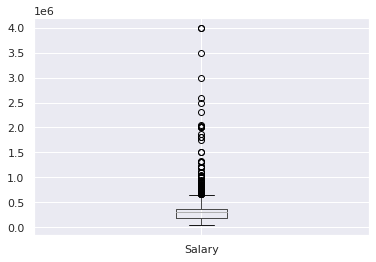

In [181]:
df.boxplot(column=['Salary'])

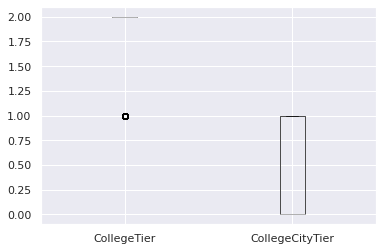

In [182]:
df.boxplot(column=['CollegeTier','CollegeCityTier'])

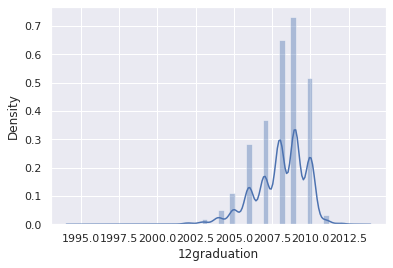

In [183]:
sns.distplot(df['12graduation'])

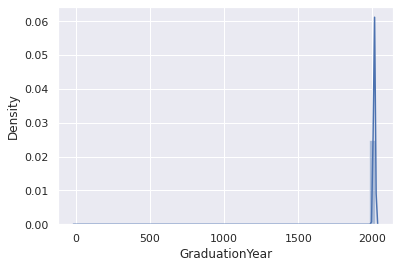

In [184]:
sns.distplot(df['GraduationYear'])


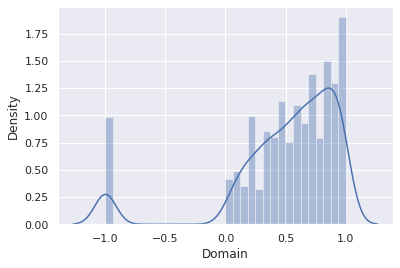

In [185]:
sns.distplot(df['Domain'])

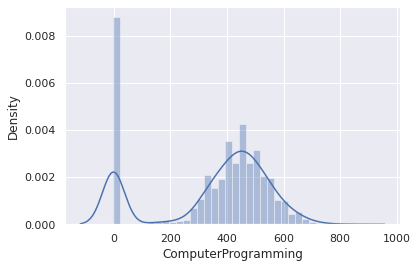

In [186]:
sns.distplot(df['ComputerProgramming'])

# by default-> sns.distplot(x, hist=True, kde=True)

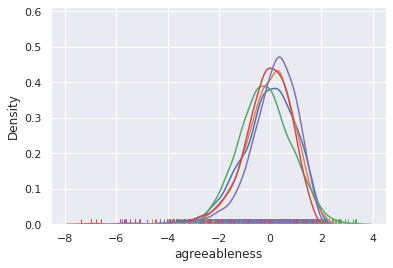

In [187]:
sns.distplot(df['conscientiousness'], hist=False, rug=True)
sns.distplot(df['extraversion'], hist=False, rug=True)
sns.distplot(df['nueroticism'], hist=False, rug=True)
sns.distplot(df['openess_to_experience'], hist=False, rug=True)
sns.distplot(df['agreeableness'], hist=False, rug=True)
plt.show()

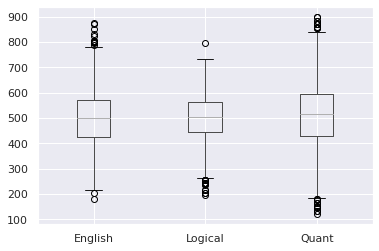

In [188]:
df.boxplot(column=['English', 'Logical', 'Quant'])

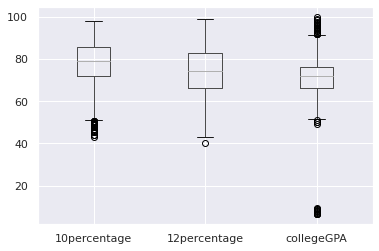

In [189]:
df.boxplot(column=['10percentage', '12percentage', 'collegeGPA'])

**10 Percentage:** on an average student has scored 80%

**12 Percentage:** on an average student has scored 75%

**CollegeGPA:** on an average student has scored 70%


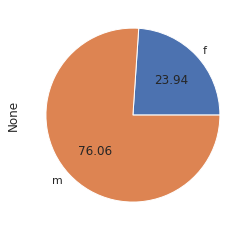

In [190]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

**Female:** 23.94

**Male:** 76.06

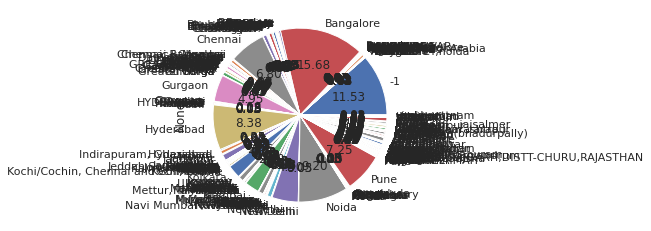

In [191]:
df.groupby('JobCity').size().plot(kind='pie', autopct='%.2f')

**Bangalore has the highest number **

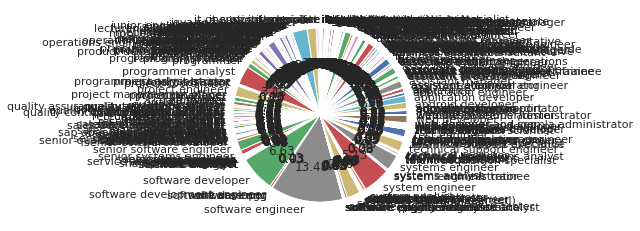

In [192]:
df.groupby('Designation').size().plot(kind='pie', autopct='%.2f')

**Software Engineering the major Job Designation**

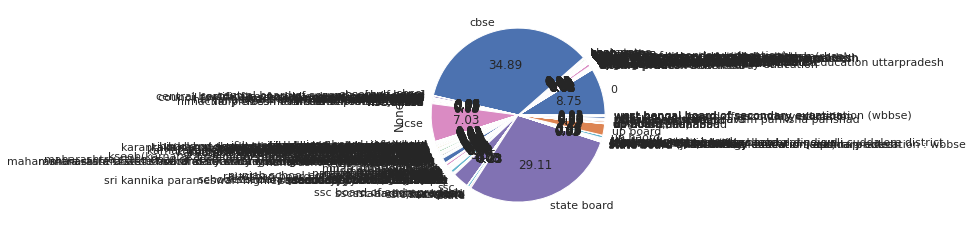

In [193]:
df.groupby('10board').size().plot(kind='pie', autopct='%.2f')

**34.89% of the people have studied 10 grade in CBSE**

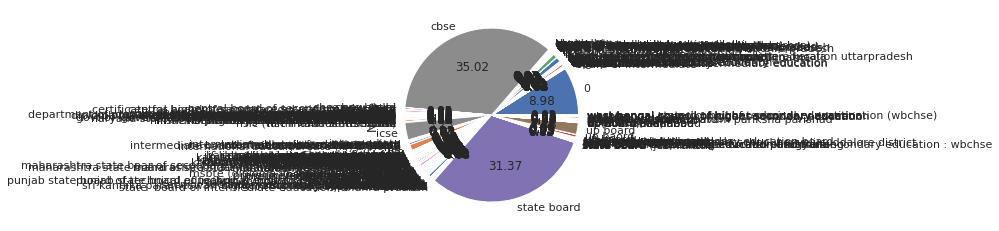

In [194]:
df.groupby('12board').size().plot(kind='pie', autopct='%.2f')

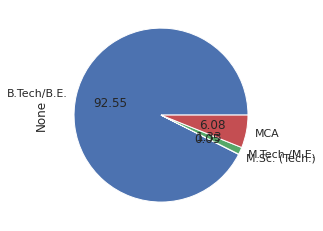

In [195]:
df.groupby('Degree').size().plot(kind='pie', autopct='%.2f')


**35.02% of the people have studied 12 grade in CBSE**

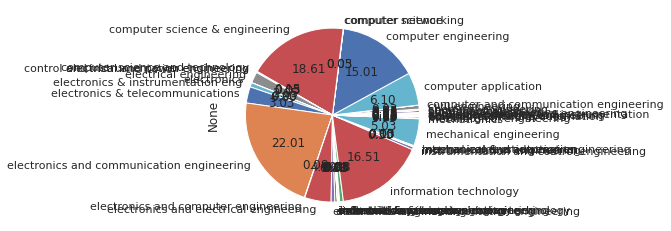

In [196]:
df.groupby('Specialization').size().plot(kind='pie', autopct='%.2f')

**22.01% of the people are from Electronics and Communication Engineering**

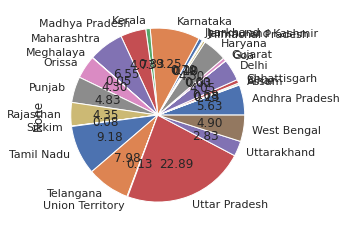

In [197]:
df.groupby('CollegeState').size().plot(kind='pie', autopct='%.2f')

**22.89% of the people are from Uttar Pradesh**

**Step - 4 - Bivariate Analysis**
- Discover the relationships between numerical columns using Scatter plots, hexbin plots,
pair plots, etc..
- Identify the patterns between categorical and numerical columns using swarmplot,
boxplot, barplot, etc..
- Mention observations after each plot.

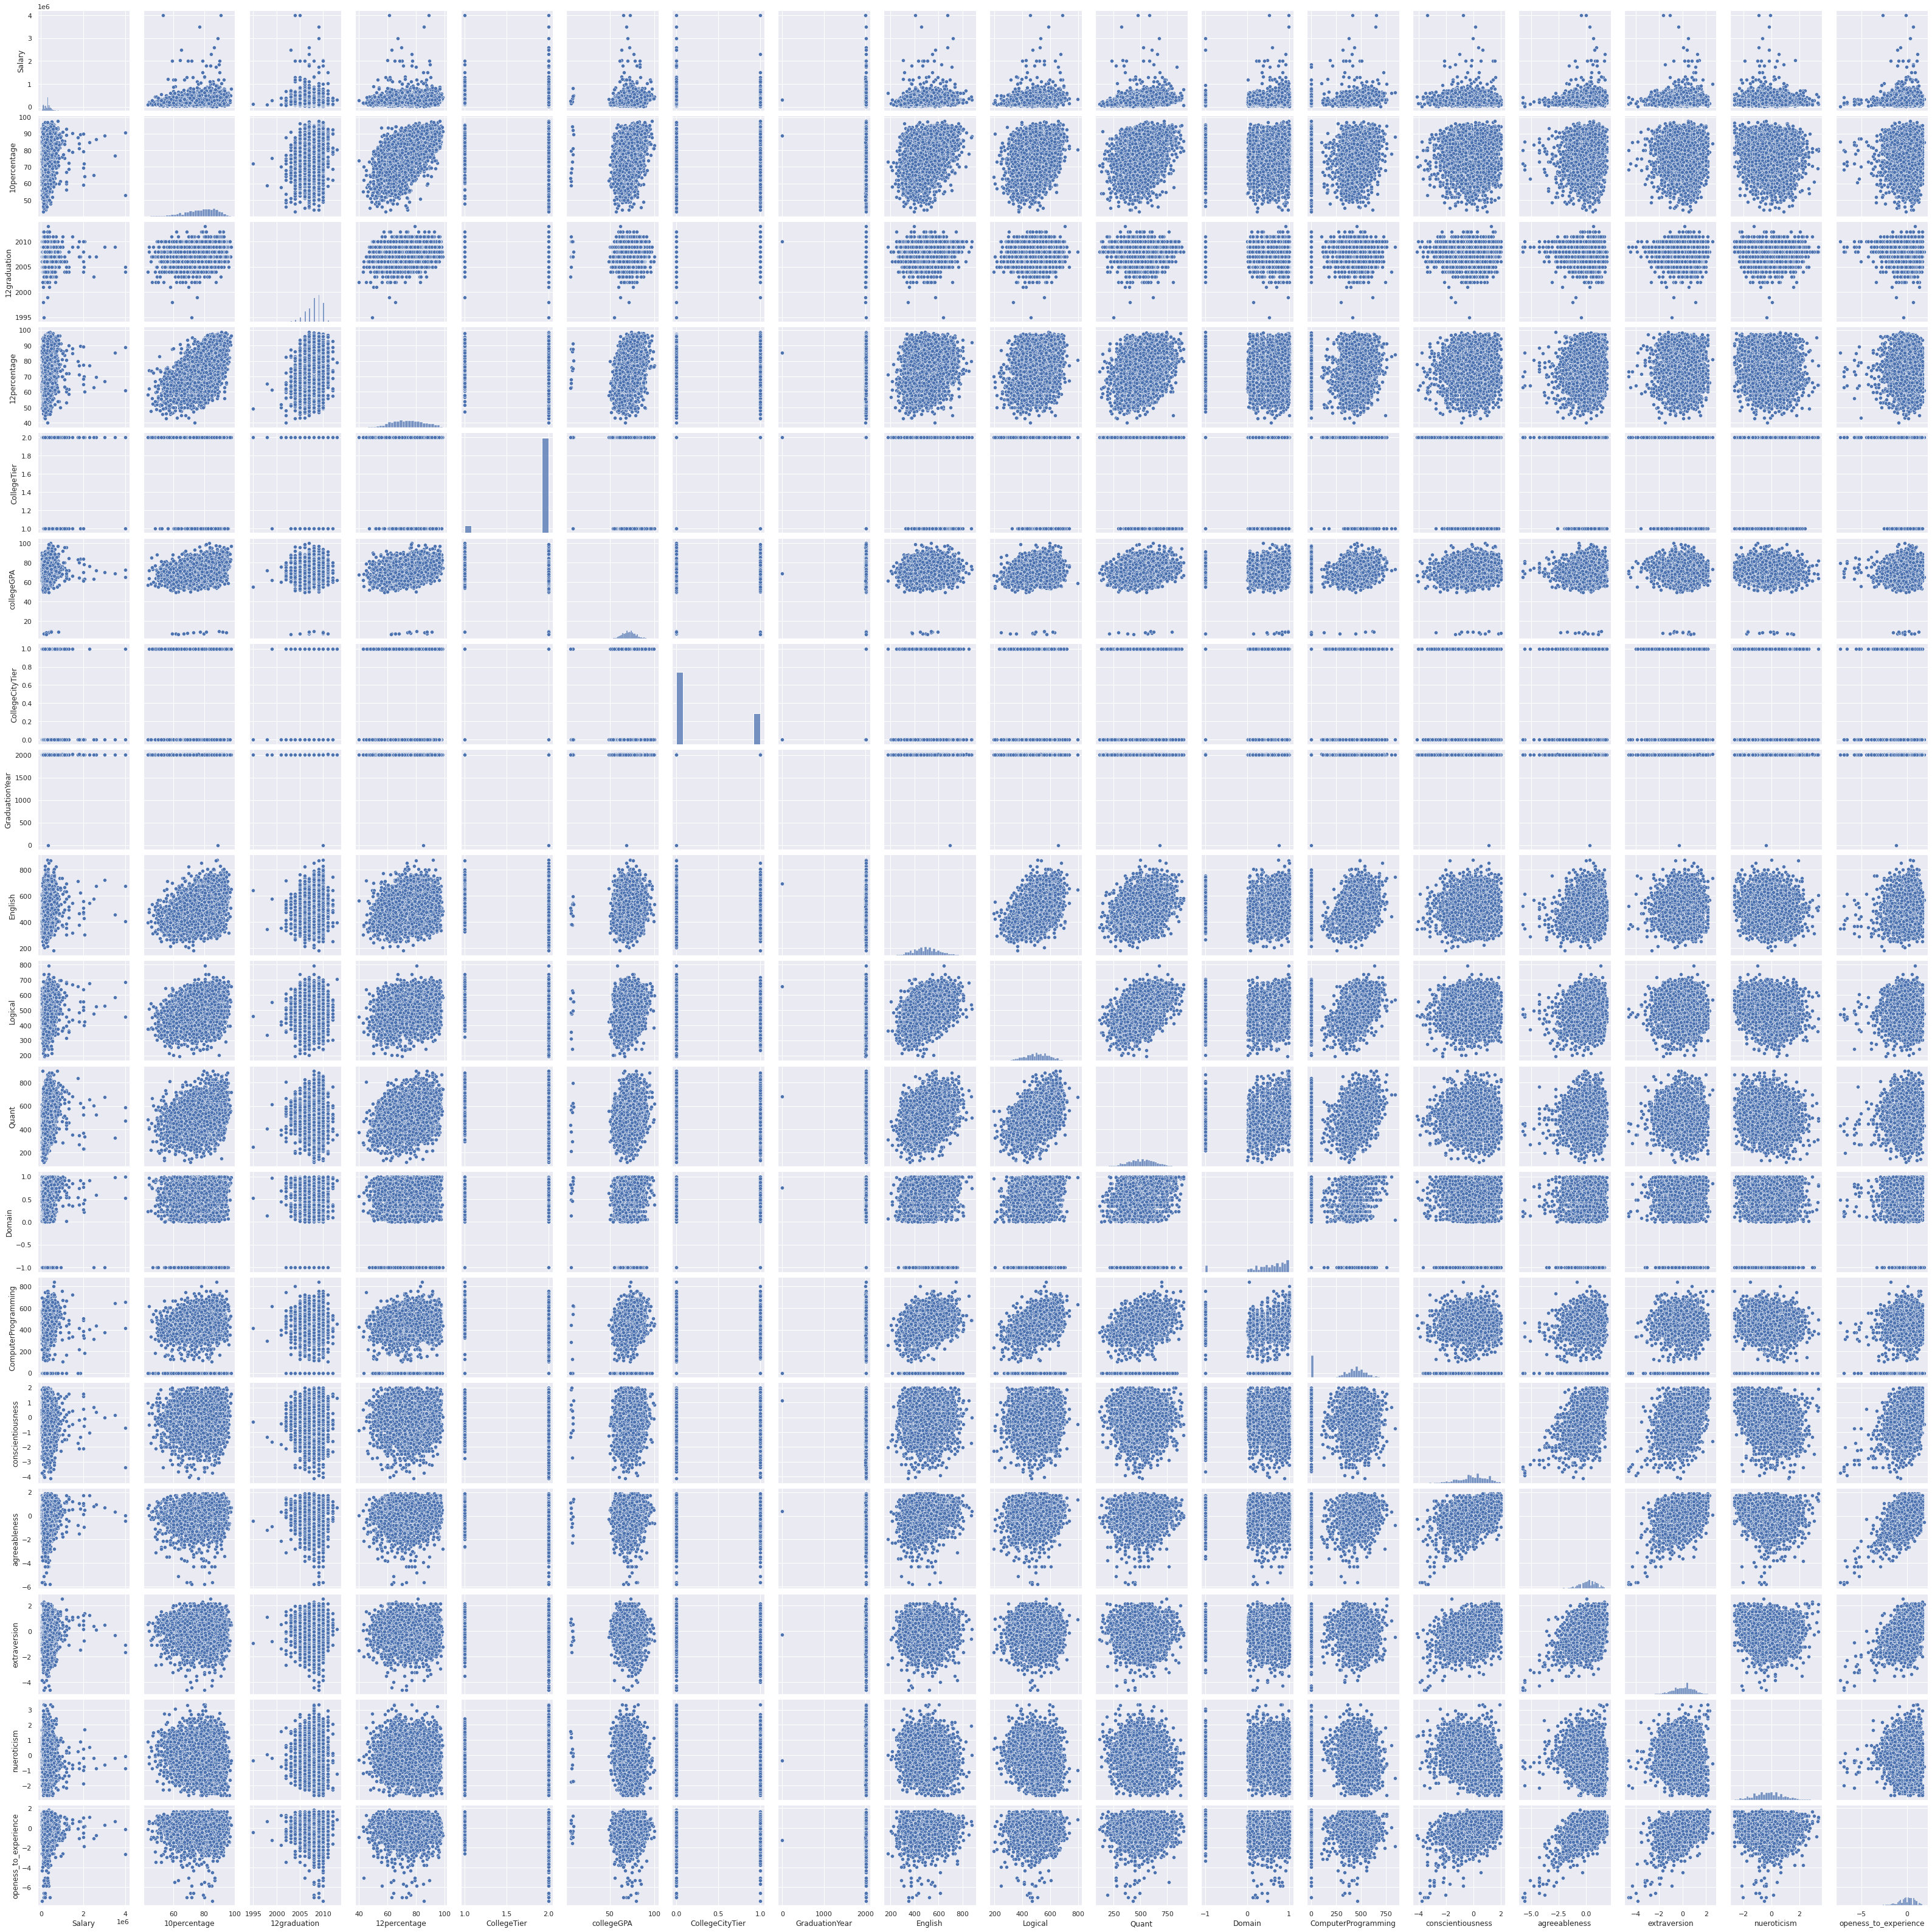

In [198]:
sns.pairplot(df)

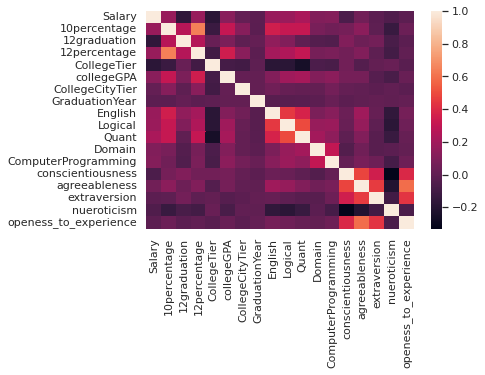

In [199]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

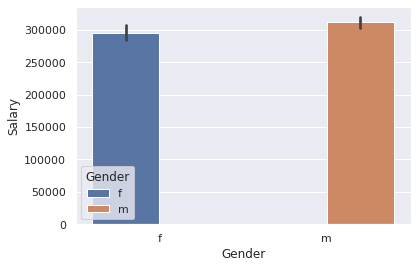

In [200]:
sns.barplot(x='Gender', y='Salary', hue='Gender', data=df)

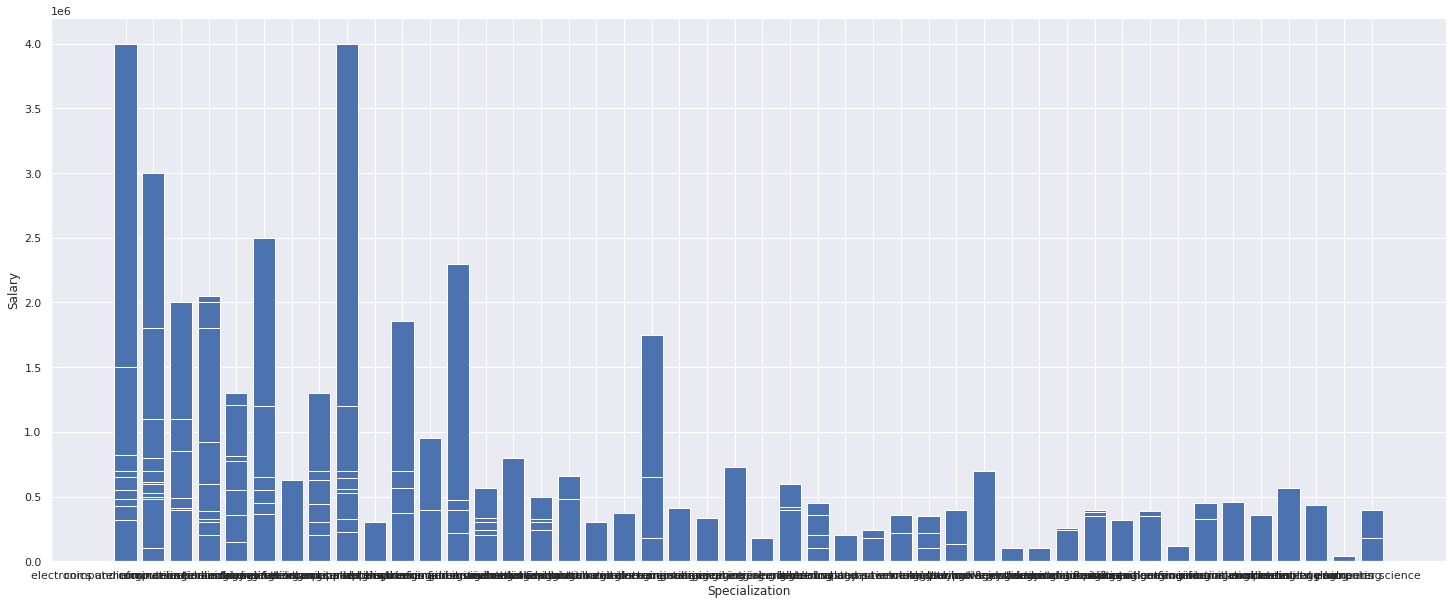

In [201]:
plt.figure(figsize = (25, 10))
plt.xlabel("Specialization")
plt.ylabel("Salary")
plt.bar(df['Specialization'], df['Salary'])
plt.show()

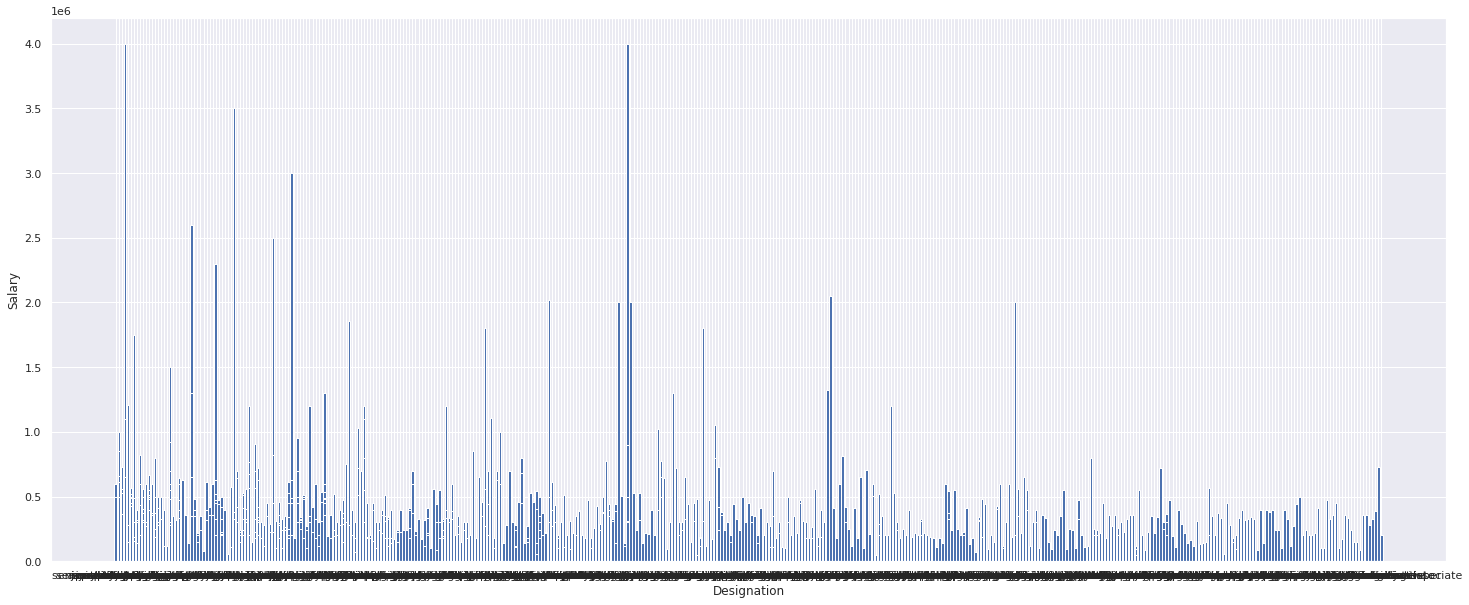

In [202]:
plt.figure(figsize = (25, 10))
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.bar(df['Designation'], df['Salary'])
plt.show()

**Step - 5 - Research Questions**
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [203]:
rslt_df = df[df['Specialization']=='computer engineering']
rslt_df

Unnamed: 0   Salary        DOJ                  DOL  \
0         train   420000 2012-06-01              present   
3         train  1100000 2011-07-01              present   
10        train   600000 2011-04-01  2015-04-01 00:00:00   
19        train   325000 2014-09-01              present   
20        train   320000 2010-11-01  2012-09-01 00:00:00   
...         ...      ...        ...                  ...   
3968      train   360000 2013-05-01  2015-01-01 00:00:00   
3979      train   550000 2013-07-01  2014-04-01 00:00:00   
3984      train   480000 2011-12-01              present   
3985      train   430000 2013-03-01              present   
3995      train   320000 2013-07-01              present   

                      Designation    JobCity Gender        DOB  10percentage  \
0         senior quality engineer  Bangalore      f 1990-02-19         84.30   
3        senior software engineer    Gurgaon      m 1989-12-05         85.60   
10           senior php developer  Bangalore      m 1989-06-24         88.60   
19              software engineer       Pune      f 1990-11-30         79.00   
20              software engineer  Bangalore      f 1988-07-25         91.20   
...                           ...        ...    ...        ...           ...   
3968            software engineer  Bangalore      f 1990-09-30         81.00   
3979            software engineer  Bangalore      m 1989-07-22         69.16   
3984            software engineer    Gurgaon      f 1990-01-18         89.80   
3985              system engineer    Gurgaon      f 1990-05-14         90.40   
3995  associate software engineer  Bangalore      m 1991-07-03         81.86   

                                        10board  ...  English  Logical Quant  \
0                board ofsecondary education,ap  ...      515      585   525   
3                                          cbse  ...      635      585   625   
10                              mp board bhopal  ...      565      455   565   
19                                         cbse  ...      485      445   435   
20    karnataka secondary school of examination  ...      455      535   445   
...                                         ...  ...      ...      ...   ...   
3968                                       cbse  ...      425      355   535   
3979                                   up board  ...      395      435   645   
3984                                       cbse  ...      535      455   525   
3985                                       cbse  ...      585      595   675   
3995                                 bse,odisha  ...      475      475   465   

        Domain ComputerProgramming conscientiousness  agreeableness  \
0     0.635979                 445            0.9737         0.8128   
3     0.974396                 615            0.0464         0.3448   
10    0.765674                 485            0.0464         0.8128   
19    0.864685                 525            0.8192         0.2668   
20    0.635979                 445           -0.1082         0.9688   
...        ...                 ...               ...            ...   
3968  0.793581                 495            0.0464         0.3448   
3979  0.990009                 655           -0.5719         0.5008   
3984  0.843124                 515           -0.2628         0.1888   
3985  0.901490                 545            0.2782         0.3448   
3995  0.488348                 405           -1.5765        -1.5273   

      extraversion nueroticism  openess_to_experience  
0           0.5269      1.3549                -0.4455  
3          -0.3440     -0.4078                -0.9194  
10          0.0914      0.1798                 0.0284  
19         -0.2714     -0.4078                -0.1295  
20          0.5269     -0.2902                 0.3444  
...            ...         ...                    ...  
3968       -0.3440      0.6204                 0.3444  
3979       -0.4891      0.4148                -1.2354  
3984 

In [204]:
r1=rslt_df[rslt_df['Designation']=='software engineer']
r1

Unnamed: 0  Salary        DOJ                  DOL        Designation  \
19        train  325000 2014-09-01              present  software engineer   
20        train  320000 2010-11-01  2012-09-01 00:00:00  software engineer   
36        train  270000 2013-03-01              present  software engineer   
59        train  120000 2009-09-01  2013-04-01 00:00:00  software engineer   
76        train  800000 2012-06-01              present  software engineer   
...         ...     ...        ...                  ...                ...   
3898      train  390000 2012-08-01              present  software engineer   
3944      train  410000 2012-05-01  2015-04-01 00:00:00  software engineer   
3968      train  360000 2013-05-01  2015-01-01 00:00:00  software engineer   
3979      train  550000 2013-07-01  2014-04-01 00:00:00  software engineer   
3984      train  480000 2011-12-01              present  software engineer   

        JobCity Gender        DOB  10percentage  \
19         Pune      f 1990-11-30         79.00   
20    Bangalore      f 1988-07-25         91.20   
36    Hyderabad      f 1992-08-21         91.50   
59    Bangalore      m 1977-10-30         72.00   
76    Bangalore      m 1991-01-25         93.44   
...         ...    ...        ...           ...   
3898      Noida      f 1989-08-24         81.20   
3944      Noida      m 1989-08-03         91.30   
3968  Bangalore      f 1990-09-30         81.00   
3979  Bangalore      m 1989-07-22         69.16   
3984    Gurgaon      f 1990-01-18         89.80   

                                        10board  ...  English  Logical Quant  \
19                                         cbse  ...      485      445   435   
20    karnataka secondary school of examination  ...      455      535   445   
36                                  state board  ...      380      535   530   
59                                         cbse  ...      640      460   250   
76                        karnataka state board  ...      515      475   635   
...                                         ...  ...      ...      ...   ...   
3898                                       cbse  ...      525      625   585   
3944                                       icse  ...      595      495   565   
3968                                       cbse  ...      425      355   535   
3979                                   up board  ...      395      435   645   
3984                                       cbse  ...      535      455   525   

        Domain ComputerProgramming conscientiousness  agreeableness  \
19    0.864685                 525            0.8192         0.2668   
20    0.635979                 445           -0.1082         0.9688   
36    0.525923                 415           -1.0208         0.2124   
59    0.525923                 415           -0.3014        -0.4353   
76    0.942117                 575           -0.4173         0.9688   
...        ...                 ...               ...            ...   
3898  0.635979                 445            0.5100         1.1248   
3944  0.884123                 535            1.2828         1.7878   
3968  0.793581                 495            0.0464         0.3448   
3979  0.990009                 655           -0.5719         0.5008   
3984  0.843124                 515           -0.2628         0.1888   

      extraversion nueroticism  openess_to_experience  
19         -0.2714     -0.4078                -0.1295  
20          0.5269     -0.2902                 0.3444  
36          0.4711      0.2727                -0.0943  
59         -0.9245     -0.3490                -0.4455  
76         -0.1988     -0.2902                 0.3049  
...            ...         ...                    ...  
3898        0.5269     -0.7603                 0.6603  
3944       -0.3803      0.1798                 0.3444  
3968       -0.3440      0.6204                 0.3444  
3979       -0.4891      0.4148                -1.2354  
3984        0.3817     -0


**108 matches**




In [205]:
r2=rslt_df[rslt_df['Designation']=='associate software engineer']
r2

Unnamed: 0  Salary        DOJ                  DOL  \
343       train  300000 2014-02-01              present   
885       train  315000 2015-03-01              present   
2064      train  500000 2010-09-01  2012-07-01 00:00:00   
2387      train  330000 2013-12-01  2015-03-01 00:00:00   
2556      train  315000 2012-03-01              present   
2921      train  110000 2013-03-01  2014-12-01 00:00:00   
3519      train  220000 2012-11-01  2013-02-01 00:00:00   
3561      train  180000 2013-07-01  2014-02-01 00:00:00   
3995      train  320000 2013-07-01              present   

                      Designation    JobCity Gender        DOB  10percentage  \
343   associate software engineer  Bangalore      m 1992-09-28         66.33   
885   associate software engineer       Pune      m 1992-08-12         74.00   
2064  associate software engineer  Bangalore      m 1989-01-22         86.80   
2387  associate software engineer         -1      m 1992-12-05         79.20   
2556  associate software engineer       Pune      m 1989-07-04         70.00   
2921  associate software engineer         -1      m 1990-01-26         72.00   
3519  associate software engineer  Bangalore      m 1989-11-14         69.40   
3561  associate software engineer         -1      m 1990-11-26         69.00   
3995  associate software engineer  Bangalore      m 1991-07-03         81.86   

                                   10board  ...  English  Logical Quant  \
343                            state board  ...      535      510   680   
885                            state board  ...      465      650   655   
2064  central board of secondary education  ...      635      535   495   
2387                                  cbse  ...      545      560   665   
2556                          nashik board  ...      435      485   565   
2921        bihar school examination board  ...      405      485   495   
3519                                  icse  ...      585      645   475   
3561                           state board  ...      425      515   565   
3995                            bse,odisha  ...      475      475   465   

        Domain ComputerProgramming conscientiousness  agreeableness  \
343   0.486747                 435            0.2718         0.5454   
885   0.978799                 605           -1.7389         0.0459   
2064  0.864685                 525           -0.7264         0.5008   
2387  0.884123                 535            0.9900         1.0449   
2556  0.670743                 455           -1.1901        -0.2793   
2921  0.165633                 305           -1.6538        -1.8393   
3519  0.793581                 495           -0.5332         0.5008   
3561  0.622643                 525           -1.2287         0.3448   
3995  0.488348                 405           -1.5765        -1.5273   

      extraversion nueroticism  openess_to_experience  
343        -1.5270     0.27270                 0.6721  
885         0.7785    -1.75560                 1.0554  
2064        0.2366     0.76730                -0.2875  
2387        0.1637    -0.86820                 0.2889  
2556        0.2366    -0.17270                -0.2875  
2921       -0.9245     1.35490                -0.5245  
3519       -0.9245    -0.26090                -0.9194  
3561        0.3817     0.53233                -0.6035  
3995       -1.5051    -1.31840                -0.7615  

[9 rows x 30 columns]

**9 Matches**

**Step - 7 - (Bonus) Come up with some interesting conclusions or research questions.**

-Salary Based on Job Location

-Salary pckage based of College Tier

-Which Designation pays the Highest?